In [1]:
#####소아 청소년 인구수#####

import pandas as pd
import re


# CSV 파일 불러오기 (한글 인코딩 처리)
file_path = "연령별인구.csv"
df = pd.read_csv(file_path, encoding="cp949")

#행정구역 명칭 깔끔히 변경
df["행정구역"] = (
    df["행정구역"]
    .str.replace(r"\(.*\)", "", regex=True)   # 괄호 전체 제거
    .str.replace(r"\s+", " ", regex=True)     # 여러 공백 → 한 칸
    .str.strip()                               # 앞뒤 공백 제거
)

#불필요한 컬럼 삭제
cols_to_keep = ["행정구역", "2023년_계_연령구간인구수"]
df = df[cols_to_keep]

#전국 행 제거
df = df[df["행정구역"] != "전국"].reset_index(drop=True)

#컬렴명 변환
df = df.rename(columns={
    "2023년_계_연령구간인구수": "소아청소년_인구수"
})

#int로 변환
df["소아청소년_인구수"] = (
    df["소아청소년_인구수"]
    .str.replace(",", "", regex=False)  # 쉼표 제거
    .astype(int)                        # 정수형 변환
)
#전북특별자치도
df["행정구역"] = df["행정구역"].replace("전라북도", "전북특별자치도")

df






,행정구역,소아청소년_인구수
0,서울특별시,1246773
1,부산광역시,457742
2,대구광역시,364524
3,인천광역시,474408
4,광주광역시,247304
5,대전광역시,234563
6,울산광역시,188548
7,세종특별자치시,94277
8,경기도,2310181
9,강원특별자치도,219925


In [2]:
####도시면적####

file_path1 = "도시지역면적.csv"
df1 = pd.read_csv(file_path1, encoding="UTF-8")

#불필요한 컬럼 삭제
df1 = df1[["소재지(시군구)별", "2023"]]

#컬럼명 변경
df1 = df1.rename(columns={
    "소재지(시군구)별": "행정구역",
    "2023": "도시면적"
})

#전국 행 삭제
df1 = df1[df1["행정구역"] != "전국"].reset_index(drop=True)

df1


,행정구역,도시면적
0,서울특별시,605673772
1,부산광역시,940825056
2,대구광역시,808195732
3,인천광역시,512816173
4,광주광역시,479838049
5,대전광역시,496123890
6,울산광역시,671649337
7,세종특별자치시,141833041
8,경기도,3370827754
9,강원특별자치도,1004738631


In [3]:
####지역전체면적####

file_path2= "지역전체면적.csv"
df2 = pd.read_csv(file_path2, encoding="UTF-8")

#공백제거
df2.columns = df2.columns.str.strip()

#17개 시도행만 추출
sido_list = [
    "서울특별시", "부산광역시", "대구광역시", "인천광역시", "광주광역시",
    "대전광역시", "울산광역시", "세종특별자치시",
    "경기도", "강원특별자치도", "충청북도", "충청남도",
    "전라북도", "전라남도",
    "경상북도", "경상남도", "제주특별자치도"
]
df2 = df2[df2["남북한별"].isin(sido_list)].reset_index(drop=True)

#필요컬럼만 남김
df2 = df2[["남북한별", "2023"]].copy()

#컬럼이름 변경
df2 = df2.rename(columns={
    "남북한별": "행정구역",
    "2023": "지역전체면적"
})
#int변환
df2["지역전체면적"] = df2["지역전체면적"].astype(int)
#전북특별자치도
df2["행정구역"] = df2["행정구역"].replace("전라북도", "전북특별자치도")


df2


,행정구역,지역전체면적
0,서울특별시,605
1,부산광역시,771
2,대구광역시,1499
3,인천광역시,1067
4,광주광역시,501
5,대전광역시,540
6,울산광역시,1063
7,세종특별자치시,465
8,경기도,10200
9,강원특별자치도,16831


In [4]:
###병원수###
df3 = pd.read_excel('소아청소년과_병원수.xlsx')

#빈 행 제거
df3 = df3.dropna(how="all")

#헤더 바꾸기
df3.columns = df3.iloc[0]
df3 = df3.drop(df3.index[0])

#필요컬럼만 선택
df3 = df3[["시도", "시군구", "소아청소년과"]].copy()

#시도별로만 남기기
df3 = df3[df3["시군구"] == "계"].reset_index(drop=True)
df3 = df3[["시도", "소아청소년과"]]
df3 = df3.rename(columns={
    "시도": "행정구역",
    "소아청소년과": "소아청소년과_병원수"
})

#병원수 int로 변환
df3["소아청소년과_병원수"] = df3["소아청소년과_병원수"].astype(int)

#전북특별자치도
df3["행정구역"] = df3["행정구역"].replace("전라북도", "전북특별자치도")

df3


/opt/homebrew/Caskroom/miniforge/base/envs/2025SDA/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


1,행정구역,소아청소년과_병원수
0,서울특별시,451
1,부산광역시,137
2,대구광역시,116
3,인천광역시,143
4,광주광역시,42
5,대전광역시,56
6,울산광역시,34
7,세종특별자치시,26
8,경기도,680
9,충청북도,56


In [5]:
#세개의 데이터프레임 합침
df_final = (
    df.merge(df2, on="행정구역", how="inner")
      .merge(df1, on="행정구역", how="inner")
      .merge(df3, on="행정구역", how="inner")
)
#면적 단위 통일
df_final["도시면적"] = df_final["도시면적"] / 1_000_000

#소숫점 버림
df_final["도시면적"] = df_final["도시면적"].astype(int)

df_final


,행정구역,소아청소년_인구수,지역전체면적,도시면적,소아청소년과_병원수
0,서울특별시,1246773,605,605,451
1,부산광역시,457742,771,940,137
2,대구광역시,364524,1499,808,116
3,인천광역시,474408,1067,512,143
4,광주광역시,247304,501,479,42
5,대전광역시,234563,540,496,56
6,울산광역시,188548,1063,671,34
7,세종특별자치시,94277,465,141,26
8,경기도,2310181,10200,3370,680
9,강원특별자치도,219925,16831,1004,57


In [6]:
from scipy.stats import shapiro

print(df_final.dtypes)
print(shapiro(df_final['소아청소년_인구수']))
print(shapiro(df_final['소아청소년과_병원수']))

행정구역          object
소아청소년_인구수      int64
지역전체면적         int64
도시면적           int64
소아청소년과_병원수     int64
dtype: object
ShapiroResult(statistic=np.float64(0.5934517825296852), pvalue=np.float64(9.002650048661254e-06))
ShapiroResult(statistic=np.float64(0.5794468750852625), pvalue=np.float64(6.6282013811299875e-06))


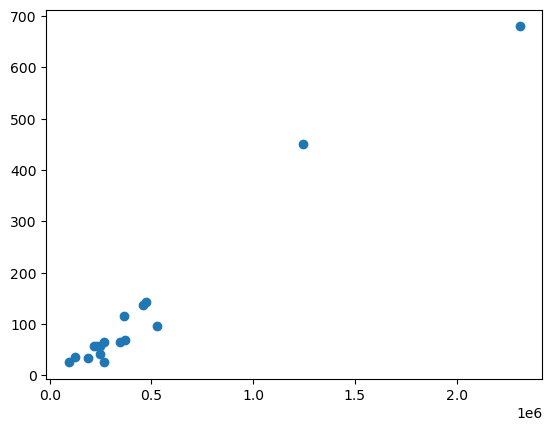

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df_final['소아청소년_인구수'], df_final['소아청소년과_병원수'])

{'whiskers': [<matplotlib.lines.Line2D at 0x122541f10>,
 'caps': [<matplotlib.lines.Line2D at 0x122543690>,
 'boxes': [<matplotlib.lines.Line2D at 0x122527b10>],
 'medians': [<matplotlib.lines.Line2D at 0x122550ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x122551a90>],
 'means': []}

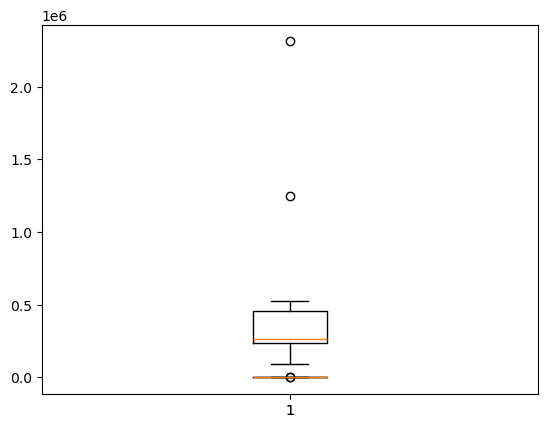

In [8]:
plt.boxplot(df_final['소아청소년_인구수'])
plt.boxplot(df_final['소아청소년과_병원수'])

In [9]:
#가설검정
from scipy.stats import spearmanr
corr, p = spearmanr(df_final['소아청소년_인구수'],
                    df_final['소아청소년과_병원수'])
print(corr, p)


0.8895712217784308 1.7652306605174078e-06


In [10]:
from scipy.stats import shapiro

print(shapiro(df_final['지역전체면적']))
print(shapiro(df_final['소아청소년과_병원수']))

ShapiroResult(statistic=np.float64(0.8284067828373416), pvalue=np.float64(0.005111549935271839))
ShapiroResult(statistic=np.float64(0.5794468750852625), pvalue=np.float64(6.6282013811299875e-06))


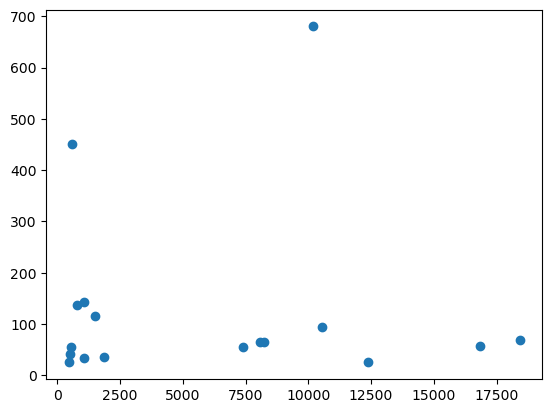

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df_final['지역전체면적'], df_final['소아청소년과_병원수'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12262e8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12262ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12261a950>],
 'medians': [<matplotlib.lines.Line2D at 0x1226396d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12263a150>],
 'means': []}

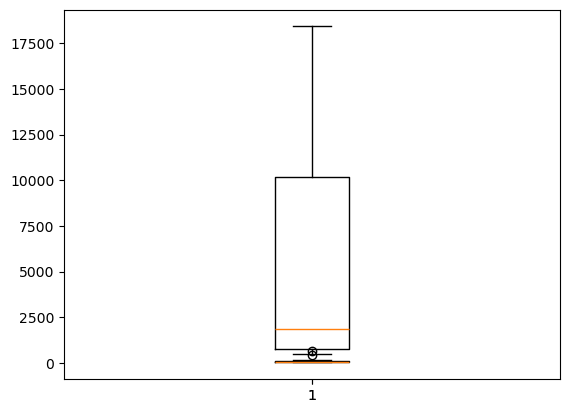

In [12]:
plt.boxplot(df_final['지역전체면적'])
plt.boxplot(df_final['소아청소년과_병원수'])

In [13]:
#가설검정
from scipy.stats import spearmanr
corr1, p1 = spearmanr(df_final['지역전체면적'],
                    df_final['소아청소년과_병원수'])
print(corr1, p1)

0.13251543717526973 0.6121524029067718


In [14]:
print(shapiro(df_final['도시면적']))
print(shapiro(df_final['소아청소년과_병원수']))

ShapiroResult(statistic=np.float64(0.8011612941467038), pvalue=np.float64(0.002104472494906339))
ShapiroResult(statistic=np.float64(0.5794468750852625), pvalue=np.float64(6.6282013811299875e-06))


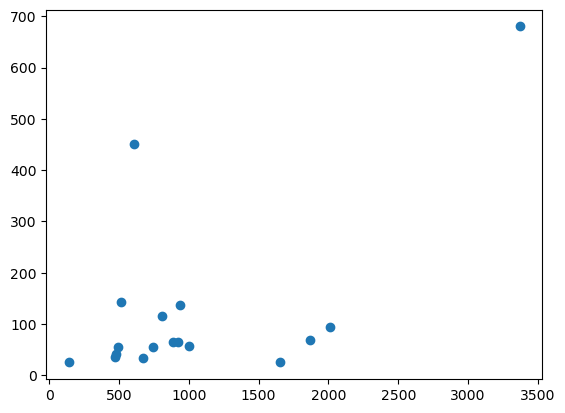

In [15]:
plt.scatter(df_final['도시면적'], df_final['소아청소년과_병원수'])

{'whiskers': [<matplotlib.lines.Line2D at 0x122724ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x122726550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1227133d0>],
 'medians': [<matplotlib.lines.Line2D at 0x122727d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x122730910>],
 'means': []}

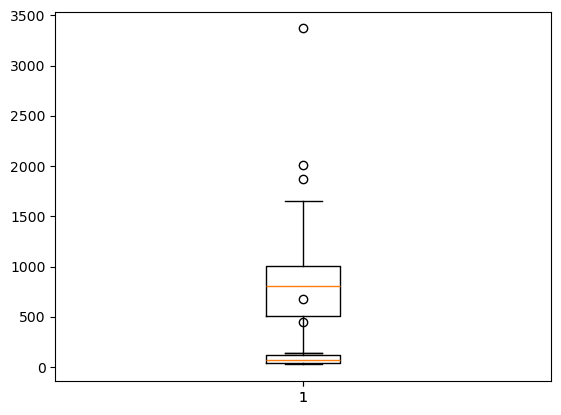

In [16]:
plt.boxplot(df_final['도시면적'])
plt.boxplot(df_final['소아청소년과_병원수'])

In [17]:
#가설검정
from scipy.stats import spearmanr
corr2, p2 = spearmanr(df_final['도시면적'],
                    df_final['소아청소년과_병원수'])
print(corr2, p2)

0.4085892646237483 0.10345445121282182


In [18]:
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("소아청소년과_병원수 ~ 소아청소년_인구수", data=df_final).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             소아청소년과_병원수   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     499.2
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           6.30e-13
Time:                        23:31:22   Log-Likelihood:                -81.245
No. Observations:                  17   AIC:                             166.5
Df Residuals:                      15   BIC:                             168.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2507      9.983     -2.229      0.0

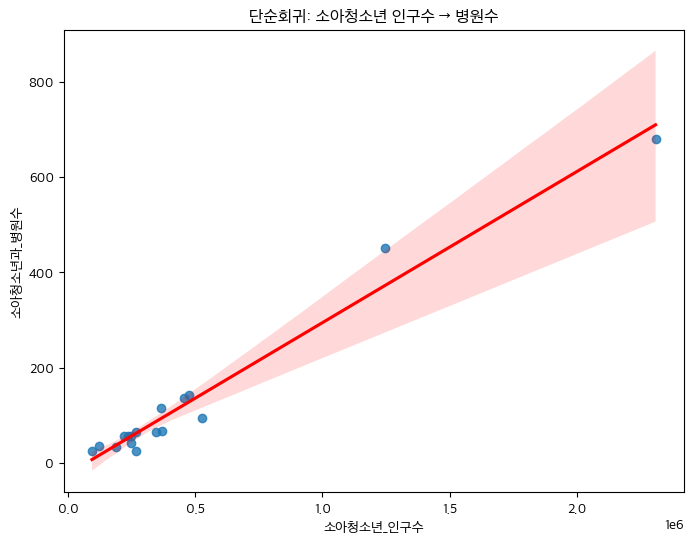

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(
    x="소아청소년_인구수", 
    y="소아청소년과_병원수", 
    data=df_final,
    line_kws={"color":"red"}
)
plt.title("단순회귀: 소아청소년 인구수 → 병원수")
plt.show()


In [26]:
df_final["예측값"] = model.fittedvalues
df_final["잔차"] = model.resid
df_final

,행정구역,소아청소년_인구수,지역전체면적,도시면적,소아청소년과_병원수,예측값,잔차
0,서울특별시,1246773,605,605,451,372.854848,78.145152
1,부산광역시,457742,771,940,137,122.808930,14.191070
2,대구광역시,364524,1499,808,116,93.267911,22.732089
3,인천광역시,474408,1067,512,143,128.090428,14.909572
4,광주광역시,247304,501,479,42,56.120596,-14.120596
5,대전광역시,234563,540,496,56,52.082941,3.917059
6,울산광역시,188548,1063,671,34,37.500671,-3.500671
7,세종특별자치시,94277,465,141,26,7.625953,18.374047
8,경기도,2310181,10200,3370,680,709.851531,-29.851531
9,강원특별자치도,219925,16831,1004,57,47.444122,9.555878


/var/folders/80/x9ztm2rs5c33hn_3qt3qb6ww0000gn/T/ipykernel_69882/2963588831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


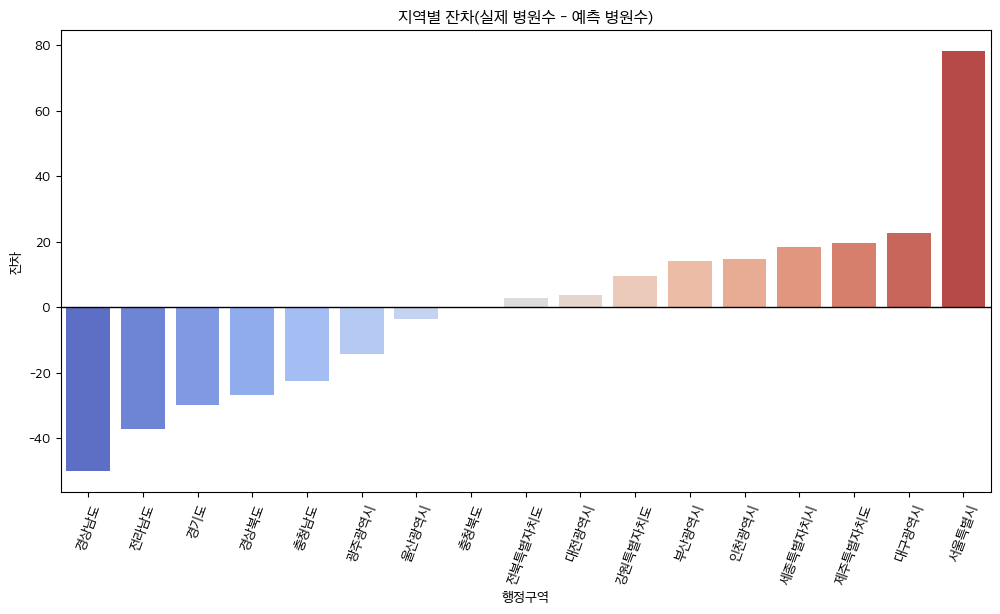

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x="행정구역",
    y="잔차",
    data=df_final.sort_values("잔차"),
    palette="coolwarm"
)
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=70)
plt.title("지역별 잔차(실제 병원수 - 예측 병원수)")
plt.ylabel("잔차")
plt.show()

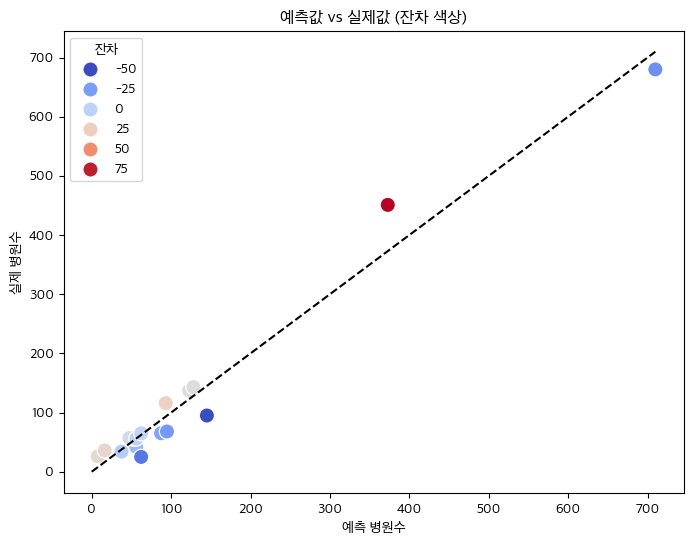

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_final["예측값"],
    y=df_final["소아청소년과_병원수"],
    hue=df_final["잔차"],
    palette="coolwarm",
    s=120
)
plt.plot([0, max(df_final["예측값"])],
         [0, max(df_final["예측값"])],
         color="black", linestyle="--")

plt.xlabel("예측 병원수")
plt.ylabel("실제 병원수")
plt.title("예측값 vs 실제값 (잔차 색상)")
plt.show()
